# 协方差
> 描述的是两个变量共同变化的趋势，其实就是归一化前的相关系数

> + 如果两个变量的变化趋势一致，也就是说如果其中一个大于自身的期望值，另外一个也大于自身的期望值，那么两个变量之间的协方差就是正值。   
> + 如果两个变量的变化趋势相反，即其中一个大于自身的期望值，另外一个却小于自身的期望值，那么两个变量之间的协方差就是负值  
> + 如果协方差值为 0，也是就是统计上说的“相互独立”


$$ cov(X,Y) = \frac{\sum_{i=1}^n(X_i - \bar{X})(Y_i - \bar{Y})}{n} $$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
bhp = np.loadtxt('Data/BHP.csv', delimiter=',', usecols=(6, ), unpack=True)
bhp

array([93.72, 95.64, 94.56, 93.3 , 93.93, 92.39, 92.11, 92.36, 91.76,
       93.91, 94.6 , 93.27, 94.43, 96.02, 95.76, 94.47, 94.34, 92.22,
       88.31, 89.59, 89.02, 86.95, 84.88, 87.38, 88.56, 89.59, 88.71,
       90.02, 91.26, 90.67])

In [7]:
# 归一化

bhp_returns = np.diff(bhp) / bhp[:-1]
bhp_returns

array([ 0.02048656, -0.01129235, -0.01332487,  0.00675241, -0.01639519,
       -0.00303063,  0.00271415, -0.00649632,  0.02343069,  0.00734746,
       -0.0140592 ,  0.01243701,  0.01683787, -0.00270777, -0.01347118,
       -0.0013761 , -0.02247191, -0.04239861,  0.01449439, -0.00636232,
       -0.0232532 , -0.02380679,  0.02945335,  0.01350423,  0.01163053,
       -0.00982252,  0.01476722,  0.01377472, -0.00646504])

In [26]:
vale = np.loadtxt('Data/VALE.csv', delimiter=',', usecols=(6, ), unpack=True)
vale

array([34.37, 35.13, 35.14, 35.31, 35.57, 35.03, 33.44, 33.94, 34.21,
       34.27, 34.23, 33.76, 34.32, 34.87, 34.5 , 33.23, 33.29, 32.88,
       31.91, 32.17, 32.44, 31.91, 31.04, 31.51, 32.14, 32.42, 32.25,
       32.7 , 32.36, 32.34])

In [11]:
# 归一化

vale_returns = np.diff(vale) / vale[:-1]
vale_returns

array([ 0.02211231,  0.00028466,  0.00483779,  0.00736335, -0.01518133,
       -0.04538967,  0.01495215,  0.00795522,  0.00175387, -0.0011672 ,
       -0.01373065,  0.01658768,  0.01602564, -0.01061084, -0.03681159,
        0.0018056 , -0.01231601, -0.02950122,  0.00814792,  0.00839291,
       -0.01633785, -0.02726418,  0.01514175,  0.01999365,  0.00871189,
       -0.00524368,  0.01395349, -0.01039755, -0.00061805])

In [14]:
# 计算协方差

covariance = np.cov(bhp_returns, vale_returns)
covariance

array([[0.00028179, 0.00019766],
       [0.00019766, 0.00030123]])

In [15]:
# 查看对角线上的元素

covariance.diagonal()

array([0.00028179, 0.00030123])

In [16]:
# 计算矩阵的迹，即对角线上元素之和

covariance.trace()

0.000583023549920278

# 相关系数
> 用以反映变量之间相关关系密切程度的统计指标。相关系数也可以看成协方差：一种剔除了两个变量量纲影响、标准化后的特殊协方差,它消除了两个变量变化幅度的影响，而只是单纯反应两个变量每单位变化时的相似程度

> 相关系数的取值范围在`-1`到`1`之间。根据定义，一组数值与自身的相关系数等于`1`，这是严格线性关系的理想值

$$ corr(x, y) = \frac{Cov(x,y)}{\sqrt{\sigma_x}\sqrt{\sigma_y}} $$

$$ |corr(x,y)| \leq 1 $$

In [17]:
# 按照公式计算相关系数

covariance / (bhp_returns.std() * vale_returns.std())

array([[1.00173366, 0.70264666],
       [0.70264666, 1.0708476 ]])

In [20]:
covariance / (bhp_returns.std(ddof=1) * vale_returns.std(ddof=1))

array([[0.96719112, 0.67841747],
       [0.67841747, 1.03392182]])

# corrcoef (计算相关系数)

> 相关系数矩阵是关于对角线对称的

In [18]:
# 利用Numpy提供的方法计算相关系数

np.corrcoef(bhp_returns, vale_returns)

array([[1.        , 0.67841747],
       [0.67841747, 1.        ]])

> 由于NumPy在计算协方差时，自由度参数默认为1，即分母为N-1而不是N，从而求得总体协方差的无偏估计。而调用.std()计算标准差时，自由度参数默认为0，从而求得的是样本标准差，而非总体标准差的无偏估计。

> 如果在调用.std()方法时指定ddof=1，即自由度设为1，就可以得到与下一步计算结果相同的副对角线元素

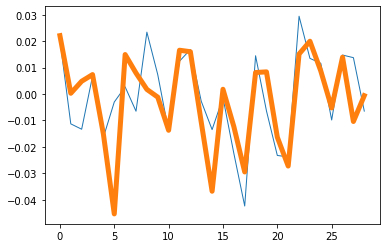

In [31]:
t = np.arange(len(bhp_returns))
plt.plot(t, bhp_returns, lw=1)
plt.plot(t, vale_returns, lw=5)

In [32]:
c, v=np.loadtxt('Data/BHP.csv', delimiter=',', usecols=(6, 7), unpack=True)
c

array([93.72, 95.64, 94.56, 93.3 , 93.93, 92.39, 92.11, 92.36, 91.76,
       93.91, 94.6 , 93.27, 94.43, 96.02, 95.76, 94.47, 94.34, 92.22,
       88.31, 89.59, 89.02, 86.95, 84.88, 87.38, 88.56, 89.59, 88.71,
       90.02, 91.26, 90.67])

In [34]:
change = np.diff(c)
change

array([ 1.92, -1.08, -1.26,  0.63, -1.54, -0.28,  0.25, -0.6 ,  2.15,
        0.69, -1.33,  1.16,  1.59, -0.26, -1.29, -0.13, -2.12, -3.91,
        1.28, -0.57, -2.07, -2.07,  2.5 ,  1.18,  1.03, -0.88,  1.31,
        1.24, -0.59])

# sign
> 可以返回数组中每个元素的正负符号，数组元素为负时返回-1，为正时返回1，否则返回0

In [35]:
signs = np.sign(change)
signs

array([ 1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,
        1.,  1., -1.])

# piecewise
> 分段给定取值

In [37]:
pieces = np.piecewise(change, condlist=[change < 0, change > 0], funclist=[-1, 1])
pieces

array([ 1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,
        1.,  1., -1.])

# array_equal
> 判断两个 array 是否有相同的 shape 和 elements

In [38]:
np.array_equal(signs, pieces)

True